# UNSUPERVISED LEARNING

Steps for the Unsupervised Learning Workflow:


1.Correlation Audit (Before PCA)

Goal: We will only use PCA if the features are highly correlated.

Steps:
 - Standardize the numerical features
 - Generate a correlation matrix
 - Visualize with a heatmap

2.PCA (if strong correlations)
Goal: Reduce dimensions while keeping ≥80% variance.

Steps:
 - Apply PCA
 - Plot cumulative explained variance
 - Retain components covering 80%

3.K-Means Clustering
Goal: Identify natural groupings (k = 2 to 10)

Steps:
 - Use Silhouette Score to choose best k
 - Plot cluster assignments
 - Interpret what makes each cluster unique

4.Visualization and Analysis


## Upload the cleaned dataset

In [ ]:
from google.colab import files
import pandas as pd
import io

# Upload the file
uploaded = files.upload()

file_name = next(iter(uploaded))
print(f"Uploaded {file_name} successfully!")

final_cleaned_df = pd.read_csv(io.BytesIO(uploaded[file_name]))

final_cleaned_df.head()

Saving final_cleaned_df.csv to final_cleaned_df (1).csv
Uploaded final_cleaned_df (1).csv successfully!


,GeoAreaName,TimePeriod,region,Access to electricity (% of population),Carbon dioxide emissions from fuel combustion (millions of tonnes),Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars),Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars),GDP per capita (current US$),Gross capital formation (annual % growth),People practicing open defecation (% of population),People using at least basic drinking water services (% of population),People using at least basic sanitation services (% of population),Proportion of population covered by at least a 2G mobile network (%),"Proportion of population using safely managed drinking water services, by urban/rural (%)",Urban population (% of total population)
0,Afghanistan,2011,SAS,43.222019,372.258,0.9588,0.1186,591.190030,6.526510,17.669144,50.827846,36.425149,85.0,20.21288,23.948
1,Afghanistan,2012,SAS,69.099998,401.982,1.0220,0.1212,638.845852,7.870495,16.860403,53.403517,37.960809,88.0,21.12400,24.160
2,Afghanistan,2013,SAS,68.290649,412.778,0.9378,0.1152,624.315455,-5.403038,16.053442,56.014043,39.506018,88.6,22.03447,24.373
3,Afghanistan,2014,SAS,89.500000,450.262,1.0262,0.1198,614.223342,12.263828,15.248276,58.659374,41.060966,89.0,22.94430,24.587
4,Afghanistan,2015,SAS,71.500000,460.030,1.0408,0.1176,556.007221,9.642426,14.444733,61.339781,42.626023,89.2,23.85359,24.803


### Correlation Audit to determine PCA application

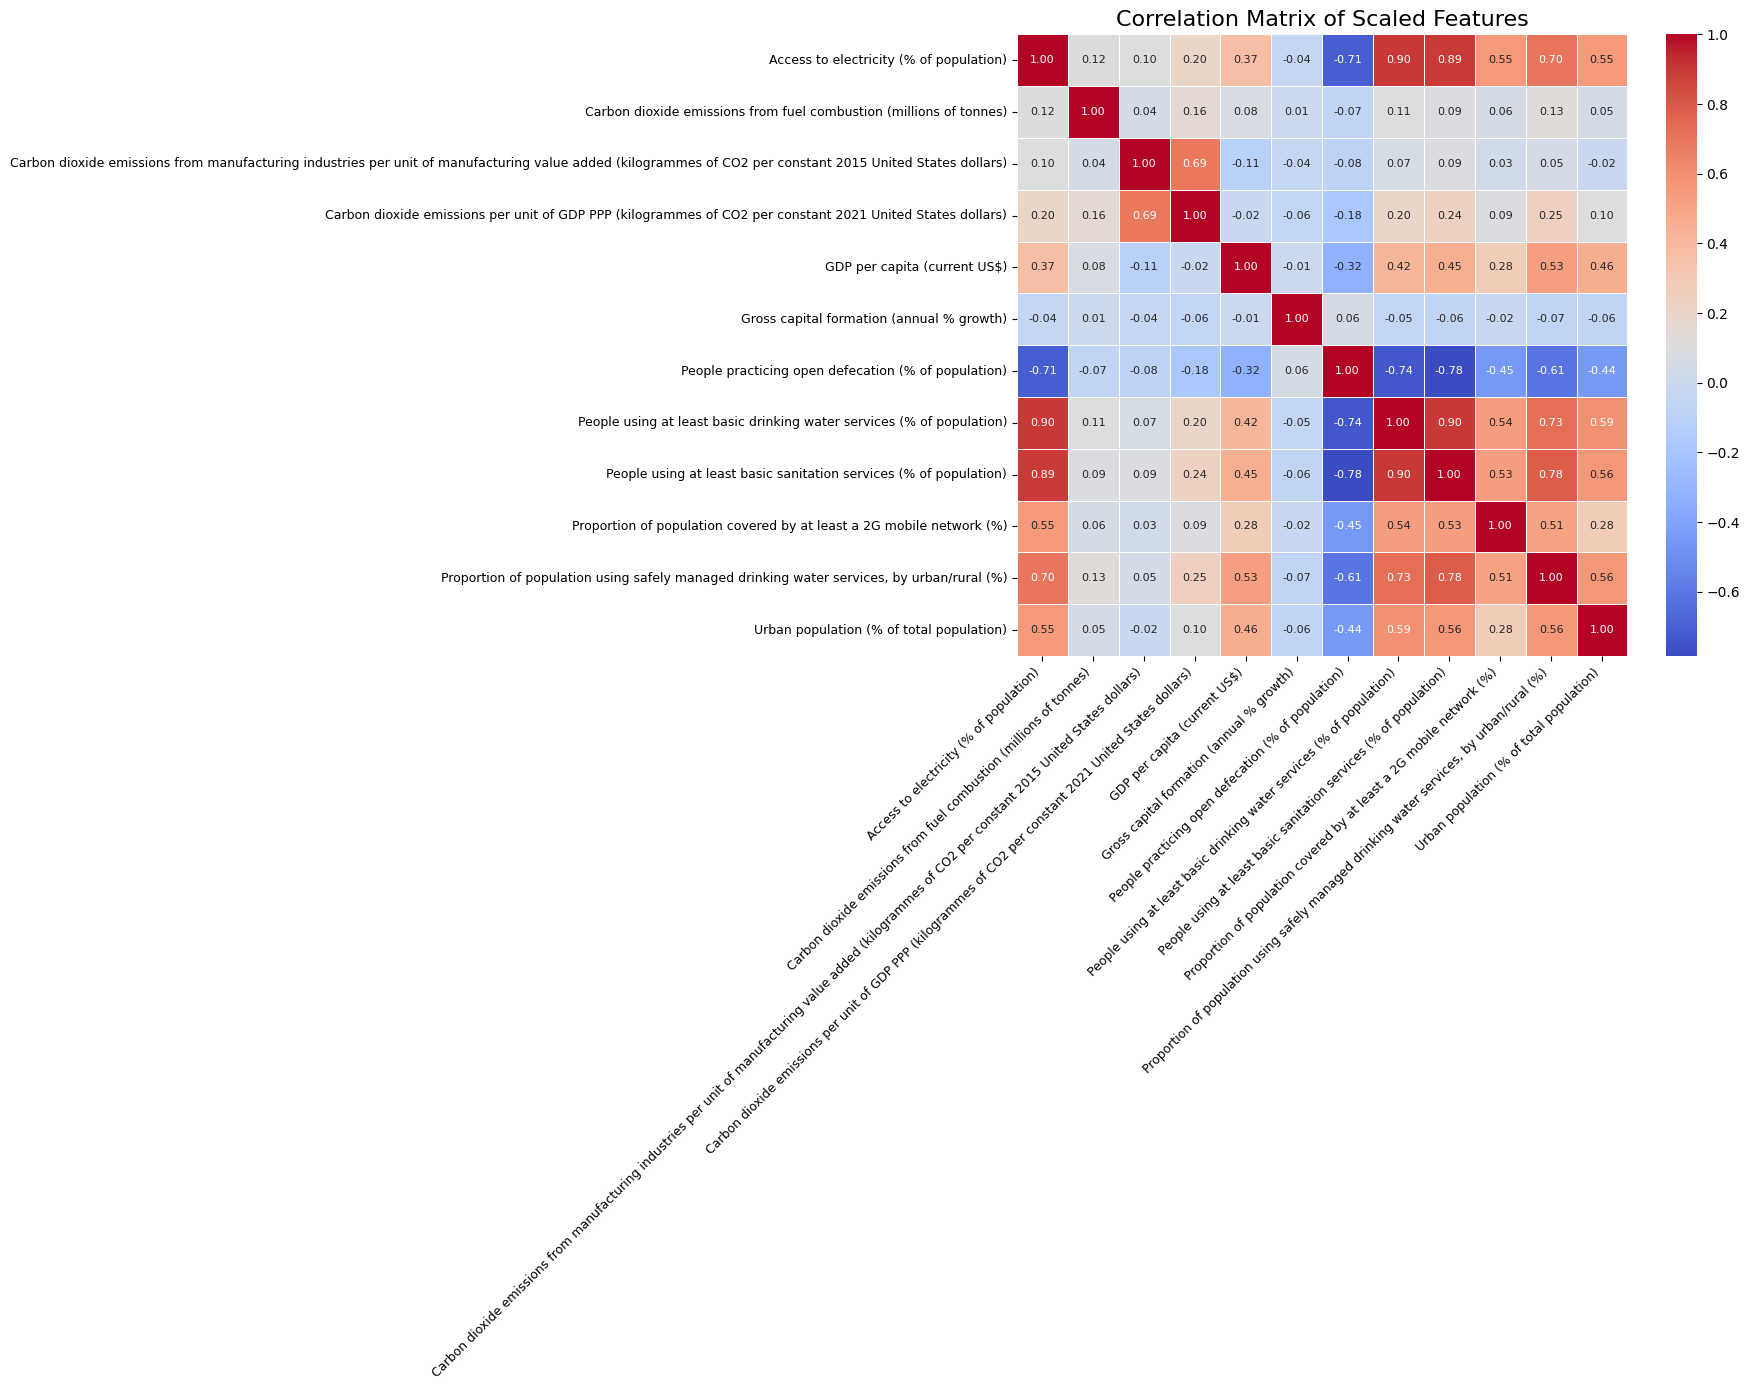

In [ ]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


# Select numerical features and scale
numeric_df = final_cleaned_df.select_dtypes(include=["float64", "int64"]).drop(columns=["TimePeriod"])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_df.columns)

# Correlation matrix
corr = scaled_df.corr()

# Plot heatmap
plt.figure(figsize=(18, 14))
heatmap = sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 8}
)

plt.title("Correlation Matrix of Scaled Features", fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

### Observation:

#### Key take‑aways from the correlation matrix

**1. Strong positive blocks**  
  
  - Access to electricity ↔ basic drinking water services (**0.90**)  
  - Access to electricity ↔ basic sanitation Services (**0.89**)  
  - Basic drinking water ↔ basic sanitation services (**0.90**)  

**2. Strong negative pair**  
- Open defecation ↔ access to electricity (**–0.71**)  

**3. Medium–high correlations**  
- CO₂ per unit GDP ↔ CO₂ per manufacturing value add (**0.69**)  

**4. Weakly‑correlated**  
- Gross capital formation, mobile‑network coverage, etc., show low correlations with most others.  

Given the obvious correlation blocks in our heat‑map and the fact that we’ll be running K‑Means next, we'll run PCA.

## Apply PCA

This means that instead of working with all 11 original indicators, we can reduce dimensionality to just 4 or 5 components while preserving most of the meaningful information.

This is good for improving clustering performance, helps reduce noise and collinearity and easier to visualize or interpret patterns later

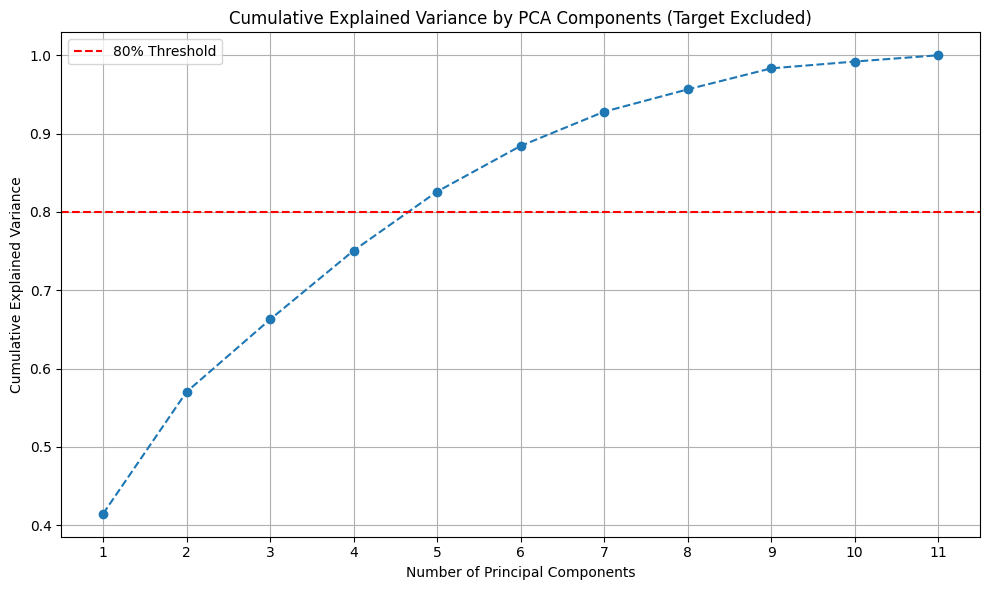

Number of components to retain at least 80% variance: 5

 DataFrame after applying PCA:


,PC1,PC2,PC3,PC4,PC5,"Proportion of population using safely managed drinking water services, by urban/rural (%)",GeoAreaName,TimePeriod
0,-3.608522,0.743209,0.207710,0.116884,0.014547,-1.707615,Afghanistan,2011
1,-2.948912,0.792013,0.269786,-0.025178,-0.289171,-1.673896,Afghanistan,2012
2,-2.813360,0.704106,-0.133352,0.327872,-0.429379,-1.640202,Afghanistan,2013
3,-2.340031,0.759783,0.436020,-0.188315,-0.497722,-1.606531,Afghanistan,2014
4,-2.501647,0.772632,0.350215,-0.089990,-0.443553,-1.572880,Afghanistan,2015


In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Separate features from target
target_col = 'Proportion of population using safely managed drinking water services, by urban/rural (%)'
features = scaled_df.drop(columns=[target_col])  # Exclude target for PCA
target = scaled_df[target_col]  # Save for later use

# Apply PCA to feature data only
pca = PCA()
pca_result = pca.fit_transform(features)  # Only using features

# Calculate explained variance ratio
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_var) + 1), cumulative_var, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components (Target Excluded)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.80, color='r', linestyle='--', label='80% Threshold')
plt.xticks(range(1, len(explained_var) + 1))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Determine optimal components
n_components_80 = np.argmax(cumulative_var >= 0.80) + 1
print(f"Number of components to retain at least 80% variance: {n_components_80}")


# Create output DataFrame with both PCs and target
pca_df = pd.DataFrame(
    pca_result[:, :n_components_80],
    columns=[f'PC{i+1}' for i in range(n_components_80)]
)
pca_df[target_col] = target.values  # Add target back for modeling

# Add metadata
pca_df['GeoAreaName'] = final_cleaned_df['GeoAreaName'].values
pca_df['TimePeriod'] = final_cleaned_df['TimePeriod'].values

print("\n DataFrame after applying PCA:")
pca_df.head()


### Check feature loadings to later label the PCs:

In [ ]:
# Compute PCA loadings (contributions of original features to each PC)
# Get feature names "excluding" the target column
feature_names = [col for col in scaled_df.columns
                if col != 'Proportion of population using safely managed drinking water services, by urban/rural (%)']

# Compute loadings
loadings = pd.DataFrame(
    pca.components_.T,  # Shape: (n_features_used_in_PCA, n_components)
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=feature_names  # Use only features that went into PCA
)

# Select top components
loadings_subset = loadings.iloc[:, :n_components_80]
loadings_subset

,PC1,PC2,PC3,PC4,PC5
Access to electricity (% of population),0.431493,-0.006215,0.006069,-0.061857,-0.150052
Carbon dioxide emissions from fuel combustion (millions of tonnes),0.067077,0.138233,0.638451,0.707773,-0.224939
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars),0.060297,0.681642,-0.048192,-0.138357,0.154747
Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars),0.129325,0.659985,0.034537,-0.008377,0.171466
GDP per capita (current US$),0.250047,-0.236237,0.112414,0.181248,0.629304
Gross capital formation (annual % growth),-0.035947,-0.075306,0.755775,-0.635356,0.110184
People practicing open defecation (% of population),-0.384092,0.003861,0.051497,0.086046,0.181256
People using at least basic drinking water services (% of population),0.438472,-0.032590,-0.010899,-0.044121,-0.082863
People using at least basic sanitation services (% of population),0.442226,-0.012161,-0.027737,-0.054167,-0.069901
Proportion of population covered by at least a 2G mobile network (%),0.297316,-0.056974,0.003296,-0.125403,-0.421296


### Check PCs Dominant Features for assigning labels

In [ ]:
# Get the top 3 features contributing to each PC
top_features_per_pc = {}
for pc in loadings_subset.columns:
    top_features = loadings_subset[pc].abs().nlargest(3).index.tolist()
    top_features_per_pc[pc] = top_features

print("\nTop features per PC (≥80% variance):")
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {', '.join(features)}")


Top features per PC (≥80% variance):
PC1: People using at least basic sanitation services (% of population), People using at least basic drinking water services (% of population), Access to electricity (% of population)
PC2: Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars), Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars), GDP per capita (current US$)
PC3: Gross capital formation (annual % growth), Carbon dioxide emissions from fuel combustion (millions of tonnes), GDP per capita (current US$)
PC4: Carbon dioxide emissions from fuel combustion (millions of tonnes), Gross capital formation (annual % growth), GDP per capita (current US$)
PC5: GDP per capita (current US$), Urban population (% of total population), Proportion of population covered by at least a 2G mobile network (%)


### **Principal Component Interpretation**

| PC  | Top Features (High Absolute Loadings)               | Label               |
|-----|----------------------------------------------------|-------------------------------|
| PC1 | `Basic sanitation (0.44), Basic drinking water (0.44), Access to electricity (0.43) | **"Water Access Infrastructure/Development Index"** |
| PC2 | `CO₂ per unit GDP` (0.66), `CO₂ from manufacturing` (0.68) | **"Industrial Carbon Intensity"** |
| PC3 | `CO₂ from fuel combustion` (0.76), `Gross capital formation` (0.64) | **"Economic Growth vs. Emissions"** |
| PC4 | `CO₂ from fuel combustion` (0.71), `Gross capital formation` (-0.64) | **"Energy-Investment Tradeoff"** |
| PC5 | `GDP per capita` (0.63), `Urban population` (0.49), Mobile network (-0.42) | **"Wealth/Urbanization"** |

- In the Codes, we will Keep using `PC1-PC5` for analysis (e.g., clustering).
- In Visualizations/Reports, we will Use the human-readable labels for clarity.

## K-Mean Clustering

### Investingating for k

k = 2 → Silhouette Score (2020 only): 0.4755
k = 3 → Silhouette Score (2020 only): 0.4868
k = 4 → Silhouette Score (2020 only): 0.4940
k = 5 → Silhouette Score (2020 only): 0.2955
k = 6 → Silhouette Score (2020 only): 0.3083
k = 7 → Silhouette Score (2020 only): 0.2874
k = 8 → Silhouette Score (2020 only): 0.2977
k = 9 → Silhouette Score (2020 only): 0.2901
k = 10 → Silhouette Score (2020 only): 0.2934


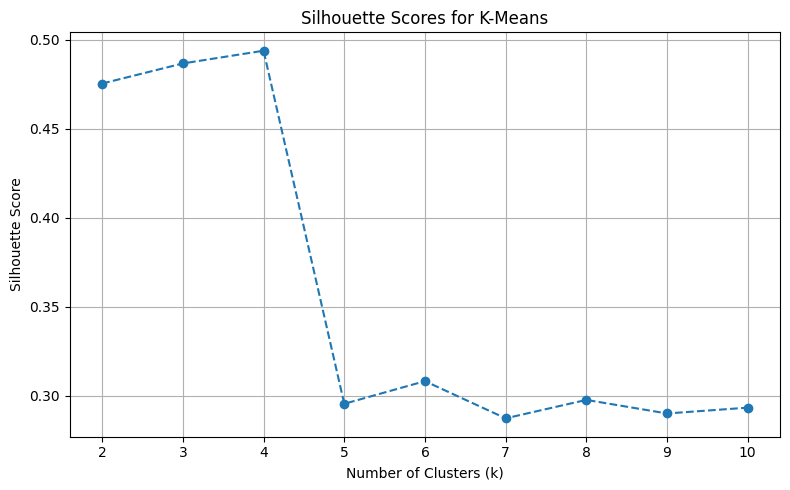

In [ ]:
from sklearn.metrics import silhouette_score

# filter the PCA frame to 2020
# Identify the 2020 rows
mask_2020      = pca_df['TimePeriod'] == 2020      # pca_df still has metadata
pca_2020       = pca_df.loc[mask_2020].reset_index(drop=True)

# Keep only the component columns
pc_cols        = [c for c in pca_2020.columns if c.startswith('PC')]
pca_2020_only  = pca_2020[pc_cols].copy()

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(pca_2020_only)
    score  = silhouette_score(pca_2020_only, labels)
    silhouette_scores.append(score)
    print(f"k = {k} → Silhouette Score (2020 only): {score:.4f}")

# 3. Plotting
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title("Silhouette Scores for K-Means")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(range(2, 11))
plt.grid(True)
plt.tight_layout()
plt.show()


### Observation:
The best silhouette score is at k = 4, meaning the clustering is most compact and well-separated with 4 clusters.


### Run final K-Means clustering (lock in k=4)

In [ ]:
k_opt     = 4
kmeans_20 = KMeans(n_clusters=k_opt,
                   random_state=42,
                   n_init=10)
pca_2020_only['Cluster'] = kmeans_20.fit_predict(pca_2020_only)

# Reattache metadata and target

result_2020 = pca_2020_only.copy()
result_2020['GeoAreaName'] = pca_2020['GeoAreaName'].values
result_2020['TimePeriod']  = pca_2020['TimePeriod'].values
result_2020['Water_Access'] = pca_2020[target_col].values

# View
display(result_2020.head())
print("Cluster distribution (2020 snapshot):")
print(result_2020['Cluster'].value_counts().sort_index())



,PC1,PC2,PC3,PC4,PC5,Cluster,GeoAreaName,TimePeriod,Water_Access
0,-1.334830,1.424216,-0.414919,0.265708,-0.715620,0,Afghanistan,2020,-1.404533
1,1.074478,0.360059,-0.739263,-0.401269,-0.705393,1,Albania,2020,0.159869
2,1.050002,0.618197,-0.833139,0.056734,-0.432678,1,Algeria,2020,0.218105
3,0.654761,0.022373,-0.022182,1.167852,0.078982,1,American Samoa,2020,0.869682
4,1.864191,-0.564400,-0.483341,0.191393,0.472419,1,Andorra,2020,0.898750


Cluster distribution (2020 snapshot):
Cluster
0     53
1    162
2      1
3      1
Name: count, dtype: int64


## Investigate the cluster profiles

In [ ]:
import plotly.express as px

# Use original (unscaled) features for interpretation
cluster_profiles = final_cleaned_df[final_cleaned_df['TimePeriod'] == 2020].copy()
cluster_profiles['Cluster'] = result_2020['Cluster'].values  # Add clusters

# Calculate mean values for interpretability
profile_metrics = [
    'Access to electricity (% of population)',
    'People using at least basic drinking water services (% of population)',
    'Carbon dioxide emissions from fuel combustion (millions of tonnes)',
    'Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars)',
    'Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars)',
    'Gross capital formation (annual % growth)',
    'People practicing open defecation (% of population)',
    'People using at least basic sanitation services (% of population)',
    'Proportion of population covered by at least a 2G mobile network (%)',
    'Urban population (% of total population)',
    'GDP per capita (current US$)'
]

cluster_profiles = cluster_profiles[profile_metrics + ['Cluster']].groupby('Cluster').mean()

# Display cluster profiles
cluster_profiles.T  # transpose to make features rows

Cluster,0,1,2,3
Access to electricity (% of population),52.598014,98.220944,100.000000,89.140320
People using at least basic drinking water services (% of population),66.450286,96.832472,94.261111,93.925857
Carbon dioxide emissions from fuel combustion (millions of tonnes),117.777274,261.084116,10004.820000,28.510000
Carbon dioxide emissions from manufacturing industries per unit of manufacturing value added (kilogrammes of CO2 per constant 2015 United States dollars),0.347412,0.508507,0.672000,4.890000
Carbon dioxide emissions per unit of GDP PPP (kilogrammes of CO2 per constant 2021 United States dollars),0.115445,0.177824,0.378000,2.109000
Gross capital formation (annual % growth),-0.765621,-11.842775,4.310804,-17.136777
People practicing open defecation (% of population),21.227039,1.702925,0.321344,1.507521
People using at least basic sanitation services (% of population),36.910035,91.442381,92.376178,89.693480
Proportion of population covered by at least a 2G mobile network (%),88.159618,97.671707,99.900000,94.000000
Urban population (% of total population),40.444000,68.391280,61.428000,55.475000


### Group countries by cluster

In [ ]:
# Group countries by cluster
clusters_by_country = result_2020.groupby('Cluster')['GeoAreaName'].unique()

# Show unique countries in each cluster
for cluster, countries in clusters_by_country.items():
    print(f"\nCluster {cluster} Countries:")
    print(sorted(countries))


Cluster 0 Countries:
['Afghanistan', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Kenya', 'Kiribati', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Myanmar', 'Namibia', 'Nicaragua', 'Niger', 'Nigeria', 'Papua New Guinea', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tuvalu', 'Uganda', 'Vanuatu', 'Yemen, Rep.', 'Zambia', 'Zimbabwe']

Cluster 1 Countries:
['Albania', 'Algeria', 'American Samoa', 'Andorra', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia an

### Cluster Summaries (2020 snapshot)

#### **Cluster 0 – “Early‑Infrastructure, Low Water Access”**
* **Key signals**  
  - Electricity ≈ 53 %  
  - Basic drinking‑water ≈ 66 %  
  - Open defecation ≈ 21 %  
  - GDP ≈ \$1.5 k  
  
  Countries are still building core utilities. Water coverage is far below the SDG target (≥ 90 %), so this group is the primary focus for expanding safely‑managed drinking‑water services.


#### **Cluster 1 – “Developed, High Water Access”**
* **Key signals**  
  - Electricity ≈ 98 %  
  - Basic drinking‑water ≈ 97 %  
  - Sanitation ≈ 91 %  
  - GDP ≈ \$21 k  
  
  Classic high‑income set with near‑universal basic water.



#### **Cluster 2 – “Industralized, High Water, Heavy Emissions”**
* **Key signals** *(China only)*  
  - Basic drinking‑water ≈ 94 %  
  - Total CO₂ > 10 billion t  
  - GDP ≈ \$10 k  
  
  Solid infrastructure but massive emissions footprint. Water access is high,


#### **Cluster 3 – “Mid‑Income, High Carbon Intensity, High Water Access”**
* **Key signals** *(Syria only)*  
  - Basic drinking‑water ≈ 94 %  
  - Electricity ≈ 89 %  
  - CO₂ intensity per manufacturing VA ≈ 4.9 kg  
  - GDP ≈ \$14 k  

  very high carbon intensity suggests an ageing energy mix.

### Add labels to the PCs and cluster labels

In [ ]:
# Rename PC columns
pc_name_mapping = {
    'PC1': 'Water_Access_Infrastructure_Development_Index',
    'PC2': 'Industrial_Carbon_Intensity',
    'PC3': 'Economic_Growth_vs_Emissions',
    'PC4': 'Energy_Investment_Tradeoff',
    'PC5': 'Wealth_Urbanization'
}

pca_labeled_df = result_2020.rename(columns=pc_name_mapping)

# Map cluster IDs to descriptive labels
cluster_name_mapping = {
    0: 'Early_Infrastructure_Low_Water_Access',
    1: 'Developed_High_Water_Access',
    2: 'Industralized_High_Water_Access_Heavy_Emissions',
    3: 'High_Carbon_Intensity_High_Water_Access'
}

# add a readable label column (keeps the numeric ID too)
pca_labeled_df['Cluster_Label'] = pca_labeled_df['Cluster'].map(cluster_name_mapping)

# Display
pca_labeled_df[
    [*pc_name_mapping.values(), 'GeoAreaName', 'TimePeriod', 'Cluster', 'Cluster_Label']
].head()


,Water_Access_Infrastructure_Development_Index,Industrial_Carbon_Intensity,Economic_Growth_vs_Emissions,Energy_Investment_Tradeoff,Wealth_Urbanization,GeoAreaName,TimePeriod,Cluster,Cluster_Label
0,-1.334830,1.424216,-0.414919,0.265708,-0.715620,Afghanistan,2020,0,Early_Infrastructure_Low_Water_Access
1,1.074478,0.360059,-0.739263,-0.401269,-0.705393,Albania,2020,1,Developed_High_Water_Access
2,1.050002,0.618197,-0.833139,0.056734,-0.432678,Algeria,2020,1,Developed_High_Water_Access
3,0.654761,0.022373,-0.022182,1.167852,0.078982,American Samoa,2020,1,Developed_High_Water_Access
4,1.864191,-0.564400,-0.483341,0.191393,0.472419,Andorra,2020,1,Developed_High_Water_Access


### Visualization and Analysis

### PCA scatterplot

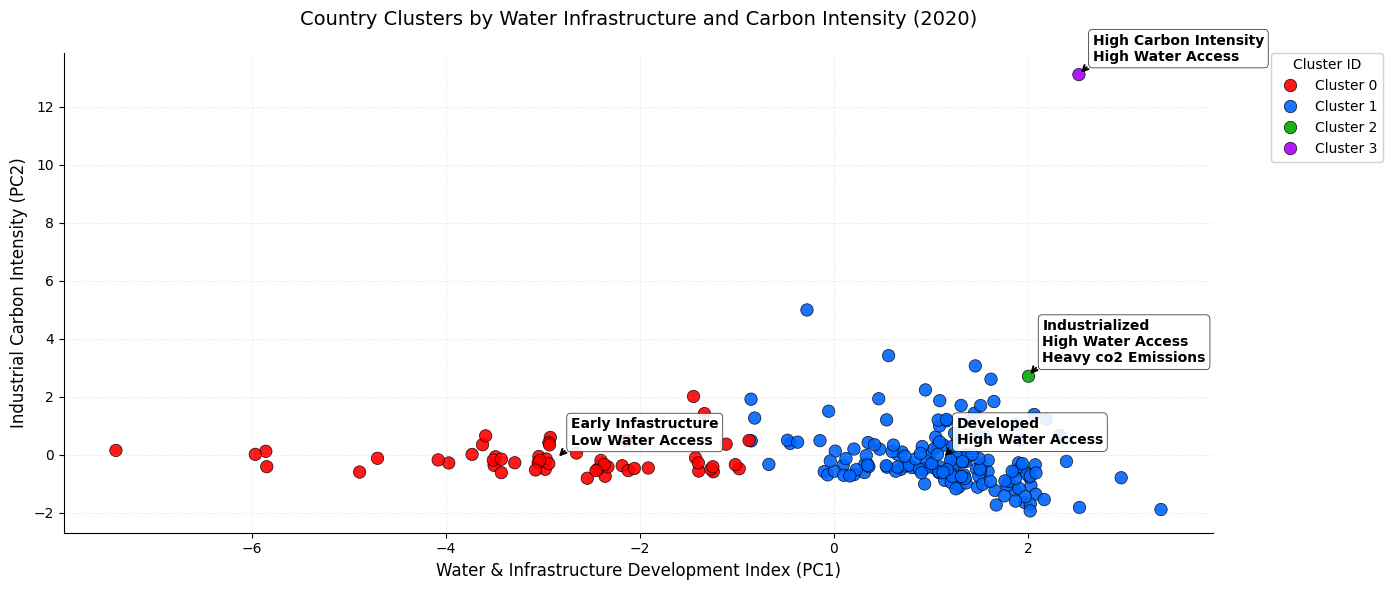

In [ ]:
# Define labels
cluster_label_map = {
    0: 'Early Infastructure\nLow Water Access',                    # Red
    1: 'Developed\nHigh Water Access',                             # Blue
    2: 'Industrialized\nHigh Water Access\nHeavy co2 Emissions',   # Green
    3: 'High Carbon Intensity\nHigh Water Access'                  # Purple
}

# Assign labels directly by Cluster ID
pca_labeled_df['Short_Label'] = pca_labeled_df['Cluster'].map(cluster_label_map)

# Compute centroids
centroids = (
    pca_labeled_df
    .groupby('Cluster')[['Water_Access_Infrastructure_Development_Index', 'Industrial_Carbon_Intensity']]
    .mean()
    .reset_index()
)
centroids['Short_Label'] = centroids['Cluster'].map(cluster_label_map)  # Adds labels

# Plot

plt.figure(figsize=(14, 6))

# Manually select colors (Red, Blue, Green, Purple)
distinct_palette = [
    '#FF0000',  # Bright Red (Cluster 0)
    '#0066FF',  # Vivid Blue (Cluster 1)
    '#00AA00',  # Strong Green (Cluster 2)
    '#AA00FF'   # Deep Purple (Cluster 3)
]

scatter = sns.scatterplot(
    data=pca_labeled_df,
    x='Water_Access_Infrastructure_Development_Index',
    y='Industrial_Carbon_Intensity',
    hue='Cluster',
    palette=distinct_palette,  # Use our custom palette
    s=80,
    alpha=0.9,
    edgecolor='k',  # Black edges for better contrast
    linewidth=0.5
)

# Annotate centroids
for idx, row in centroids.iterrows():
    plt.annotate(
        row['Short_Label'],
        xy=(row['Water_Access_Infrastructure_Development_Index'], row['Industrial_Carbon_Intensity']),
        xytext=(10, 10),
        textcoords='offset points',
        arrowprops=dict(
            arrowstyle='->',
            connectionstyle='arc3,rad=0.3',
            color='black',  # Black arrows for clarity
            lw=1.5
        ),
        fontsize=10,
        weight='bold',
        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.9, lw=0.5)
    )

plt.title('Country Clusters by Water Infrastructure and Carbon Intensity (2020)', fontsize=14, pad=20)
plt.xlabel('Water & Infrastructure Development Index (PC1)', fontsize=12)
plt.ylabel('Industrial Carbon Intensity (PC2)', fontsize=12)

sns.despine()
plt.grid(True, linestyle=':', linewidth=0.5, alpha=0.5)

handles, labels = scatter.get_legend_handles_labels()
plt.legend(
    handles,
    [f'Cluster {i}' for i in range(4)],
    title='Cluster ID',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    borderaxespad=0.,
    frameon=True,
    framealpha=0.9
)

plt.tight_layout()
plt.show()

#### Intepretation:


- **Cluster 0 (red) – Early‑Infrastructure / Low Water Access**  
  Countries on the left with low PC 1 and low PC 2. Basic drinking water services ≈ 66 %; still building core utilities. Highest priority for SDG 6 expansion.

- **Cluster 1 (blue) – Developed / High Water Access**  
  Dense cloud on the right with moderate PC 2. Near‑universal Basic drinking water services (≈ 97 %) and lower carbon intensity thanks to efficient economies. Focus shifts from access to water quality and resilience.

- **Cluster 2 (green) – Industrialised, High Water, Heavy CO₂ Emission**  
  Single point (China) with high PC 1 and elevated PC 2. Good infrastructure but heavy total emissions. Challenge: keep water supply sustainable amid rapid industrialisation.

- **Cluster 3 (magenta) – Carbon‑Intensive, High water Access**  
  Outlier at very high PC 2 (Syria). Reported water access looks decent, yet extreme carbon intensity signals ageing or disrupted energy systems. Rebuilding infrastructure and decarbonising are critical.


#### Choropleth Map

In [ ]:
import plotly.express as px

# Define cluster labels and colors
CLUSTER_INFO = {
    0: {'label': 'Early Infastructure\nLow Water Access', 'color': '#FF0000'},
    1: {'label': 'Developed\nHigh Water Access', 'color': '#0066FF'},
    2: {'label': 'Industrialized\nHigh Water Access\nHeavy Emissions', 'color': '#00AA00'},
    3: {'label': 'High Carbon Intensity\nHigh Water Acess', 'color': '#AA00FF'}
}

# Create hover text with all PCA components
pca_labeled_df['HoverText'] = pca_labeled_df.apply(
    lambda row: (
        f"<b>{row['GeoAreaName']}</b><br>"
        f"Cluster: {CLUSTER_INFO[row['Cluster']]['label']}<br>"
        f"Water/Infra Index: {row['Water_Access_Infrastructure_Development_Index']:.2f}<br>"
        f"Carbon Intensity: {row['Industrial_Carbon_Intensity']:.2f}<br>"
        f"Economic Growth vs Emissions: {row['Economic_Growth_vs_Emissions']:.2f}<br>"
        f"Energy Investment Tradeoff: {row['Energy_Investment_Tradeoff']:.2f}<br>"
        f"Wealth/Urbanization: {row['Wealth_Urbanization']:.2f}"
    ),
    axis=1
)

# Create the choropleth
fig = px.choropleth(
    pca_labeled_df,
    locations='GeoAreaName',
    locationmode='country names',
    color='Cluster',
    hover_name='HoverText',
    title='<b>Global Country Clusters by Development Indicators (2020)</b>',
    color_discrete_map={k: v['color'] for k, v in CLUSTER_INFO.items()},
    category_orders={'Cluster': sorted(CLUSTER_INFO.keys())}
)

# geographic styling
fig.update_geos(
    showframe=False,
    showcoastlines=True,
    projection_type='natural earth',
    landcolor='lightgray',
    coastlinecolor='white',
    lataxis_showgrid=True,
    lonaxis_showgrid=True
)

# Improve layout and hover
fig.update_layout(
    margin={"r":0, "t":60, "l":0, "b":0},
    title_x=0.5,
    title_font_size=18,
    legend_title_text='<b>Cluster Type</b>',
    legend=dict(
        traceorder='normal',
        itemsizing='constant',
        font=dict(size=12)
    ),
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family="Arial"
    )
)

# Customize hover template to show HTML-formatted text
fig.update_traces(
    hovertemplate='%{hovertext}<extra></extra>'
)

fig.show()

### Interpretation

### What the world map of clusters tells us (2020 snapshot)

| Colour | Cluster | Where it dominates | Take‑away |
|--------|---------|--------------------|-----------|
| **Dark blue (0)** | Early‑Infrastructure / Low Water Access | Sub‑Saharan Africa, parts of Central & South Asia, a few Pacific islands | Regions with the greatest gap to SDG 6: electricity and safe‑water coverage still far below 90 %. |
| **Purple (1)** | Developed / High Water Access | North America, Europe, most of Latin America, Oceania, large parts of MENA and East Asia | Nations with near‑universal basic water and sanitation; focus shifts to quality and sustainability. |
| **Orange (2)** | Industrialised, High Water, Heavy CO₂ | **China** (single‑country cluster) | Strong infrastructure but outsized emissions footprint; balancing industrial growth with sustainable water management is critical. |
| **Yellow‑green (3)** | Conflict‑Affected, Carbon‑Intensive | **Syria** | Reported water access is high but infrastructure is fragile; rebuilding and decarbonising are urgent. |

**Spatial patterns**

* A clear **north–south divide**: most high‑income countries fall into Cluster 1, while Cluster 0 is concentrated in lower‑income regions, especially across central Africa.
* The map visually highlights **outliers**—China and Syria—whose unique indicator profiles warranted their own clusters.
* For policymakers, the map pinpoints where investment in water‑supply infrastructure (Cluster 0) or emissions reduction (Cluster 2 & 3) should be prioritised.
